### Oasis Infobyte Internship Task 4
### Email Spam Detection with Machine Learning

#### About the Dataset
The Dataset 'SMS Spam Collection Dataset ' are taken from Kaggle .The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. It contains 5 columns v1 contains the label (ham or spam) and v2 contains the raw text and other 3 unnamed columns. We have to Detect Spam Mails Using Python and Machine Learning.

#### Data profiling

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('spam.csv',encoding='Latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [34]:
df.shape

(5572, 5)

In [35]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [38]:
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

#### Data cleaning

In [3]:
df.duplicated().sum()

403

In [4]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [5]:
df.shape

(5169, 5)

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [7]:
df.drop(df.iloc[:,2:], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ['Category','Subject']
df.columns

Index(['Category', 'Subject'], dtype='object')

In [9]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

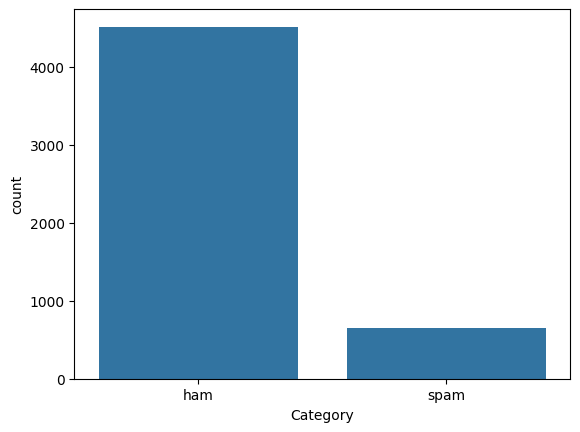

In [10]:
sns.countplot(data = df , x = 'Category')
plt.show()

In [11]:
df.loc[df['Category'] == 'spam', 'Category',] = 1
df.loc[df['Category'] == 'ham', 'Category',] = 0
df.head()

,Category,Subject
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from nltk.tokenize import RegexpTokenizer
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower() #converting string into lowercase
    tokens = reg.tokenize(string) # tokenize the string on the defined pattern
    return " ".join(tokens) # joining the tokens with single space character and returning the output

In [13]:
df['Subject'] = df['Subject'].apply(lambda string: clean_str(string))
df['Subject'][[0,1,10,90]]

0     go until jurong point crazy available only in ...
1                               ok lar joking wif u oni
10    i m gonna be home soon and i don t want to tal...
90    yeah do don t stand to close tho you ll catch ...
Name: Subject, dtype: object

In [14]:
x = df['Subject']
y = df['Category']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7)

In [16]:
x_train

1733    hi this is mandy sullivan calling from hotmix ...
2670    yes they replied my mail i m going to the mana...
3994                                r u in this continent
3199    just curious because my cuz asked what i was u...
26                          lol your always so convincing
                              ...                        
4608                                y de asking like this
2667                         why de you looking good only
546     i know but you need to get hotel now i just go...
1257            am also doing in cbe only but have to pay
4568                  at what time should i come tomorrow
Name: Subject, Length: 3876, dtype: object

In [17]:
x_test

993     the xmas story is peace the xmas msg is love t...
4599    hi did u decide wot get his bday if not ill pr...
1843                 super da good replacement for murali
3491    i will reach office around lt decimal gt amp m...
3927               babe i lost you will you try rebooting
                              ...                        
1612    rt king pro video club need help info ringtone...
4956                i m vivek i got call from your number
2585         i will be outside office take all from there
5240         gud gud k chikku tke care sleep well gud nyt
4379    done it but internet connection v slow and can...
Name: Subject, Length: 1293, dtype: object

In [18]:
y_train

1733    1
2670    0
3994    0
3199    0
26      0
       ..
4608    0
2667    0
546     0
1257    0
4568    0
Name: Category, Length: 3876, dtype: object

In [19]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [20]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5169,)
(3876,)
(1293,)


In [21]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
#min_df is tell the model that what is the minimum frequency for a word to consider.
#stop_words is a inbuilt function which is used to tell the model to remove the basic words like the, as, a, in etc.
#lowercase is used to lowercase all letters in the mail.

In [22]:
x_train_featured = feature_extraction.fit_transform(x_train)
x_test_featured = feature_extraction.transform(x_test)

In [23]:
print(x_train_featured)

  (0, 5669)	0.29396166851016237
  (0, 957)	0.17561824057696865
  (0, 5435)	0.28005317459145257
  (0, 1524)	0.20106859583781986
  (0, 4196)	0.3630943853888355
  (0, 1594)	0.29396166851016237
  (0, 4387)	0.2101828964049444
  (0, 940)	0.28005317459145257
  (0, 1960)	0.29396166851016237
  (0, 2494)	0.29396166851016237
  (0, 761)	0.2248453232375473
  (0, 5288)	0.29396166851016237
  (0, 3234)	0.29396166851016237
  (0, 2421)	0.16376664740850008
  (1, 6038)	0.3294221748971916
  (1, 419)	0.3108279639037833
  (1, 4061)	0.28975428599689
  (1, 2957)	0.45357534223740215
  (1, 3732)	0.2790409502567804
  (1, 3232)	0.3612091885441945
  (1, 2198)	0.20156311433119103
  (1, 3214)	0.28516456197836326
  (1, 4478)	0.35097605579865626
  (1, 6271)	0.22740323696452489
  (2, 1113)	1.0
  :	:
  (3870, 3035)	0.152376130612984
  (3870, 1859)	0.1972441566328628
  (3871, 303)	0.8656173019606347
  (3871, 3035)	0.5007061878451187
  (3872, 3120)	0.8379181087673718
  (3872, 2207)	0.5457959719526253
  (3873, 6035)	0.35888

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train_featured,y_train)

LogisticRegression()

In [26]:
Prediction_on_train_data = model.predict(x_train_featured)
accuracy_on_train_data = accuracy_score(y_train,Prediction_on_train_data)

In [27]:
print('Accuracy_on_train_data : ', accuracy_on_train_data*100)

Accuracy_on_train_data :  96.54282765737874


In [28]:
Prediction_on_test_data = model.predict(x_test_featured)
accuracy_on_test_data = accuracy_score(y_test,Prediction_on_test_data)

In [29]:
print('Accuracy_on_test_data : ',accuracy_on_test_data*100)

Accuracy_on_test_data :  94.66357308584686


### Predictive System

In [30]:
Mail = [input("Enter the mail content here : ")]
final_data = feature_extraction.transform(Mail)

final_prediction = model.predict(final_data)

print(final_prediction)
if (final_prediction[0]==1):
    print("The mail is spam")
else:
    print("The mail is Ham(not spam)")

Enter the mail content here :  thank you, you get free scholarship. click here to apply


[0]
The mail is Ham(not spam)
